# CS105 Final Project: Spam Email Classifier  
Made by: Francisco Bustamante, Daimon Spilker, Jaehyun Kim, Kevin Liang, Abhinav Ramachandran


# Introduction  
In this project we intend to use KNN classification to classify spam emails from non-spam emails. We are going to start with two very large folders full of spam and non-spam emails. From these folders we are going to tokenize all the words in every email to get a csv file that contains all the numerical values of each frequency of every word. From that data we are going to utilize exporatory data analysis to find the best features to use K-Nearest-Neighbor algorithm on. We are going to test our KNN algorithm using K-fold validation. By the end we want a model that is at least 80% accurate on detecting spam emails. 

# Data Collecting and Cleaning  
We started with two folders, all data we used can be found here https://spamassassin.apache.org/old/publiccorpus/ (this is a publically avalible database of spam and non-spam emails). The first folder contains 500 spam emails and the second folder contains 1000 non-spam emails. We are going to tokenize each email using the bag of words model. We cleaned up some data in this stage by having the tokenizing function only tokenize strings past the "Subject" line of the email. This is to eliminate all the unnecessary recipient/sender information included at the top of every email. We then end up with two CSV files, one for spam emails and one for non-spam emails. Every row of the CSV file corresponds to an email while every column correspsponds to a frequency of a word within that specific email.  
  
  
<b>CSV file of spam data:</b>

In [1]:
import pandas as pd
import numpy as np

spam = pd.read_csv("Spam_data.csv")
spam["Type"] = "spam"

spam.loc[:,'money':'but'] = spam.loc[:,'money':'but'].replace(np.nan, 0)

not_spam = pd.read_csv("Non_Spam_Data.csv")
not_spam["Type"] = "not_spam" 

not_spam.loc[:,'money':'but'] = spam.loc[:,'money':'but'].replace(np.nan, 0)

spam.head(3)

,and,you,=,a,<td,I,</tr>,that,is,or,...,due,<ul>,Six,recently,five,lot,strongly,Jody,possible,Type
0,3479,2503,2243,2161,1447,1120,1061,1030,1018,930,...,26,26,26,26,26,26,26,26,26,spam
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
2,3,5,3,1,0,0,0,0,3,1,...,0,0,0,0,0,0,0,0,0,spam


# Exploratory Data Analysis

We are going to use (insert_plot) and (insert_plot) to search for the best features to use for our KNN classifier. 

<function matplotlib.pyplot.show(close=None, block=None)>

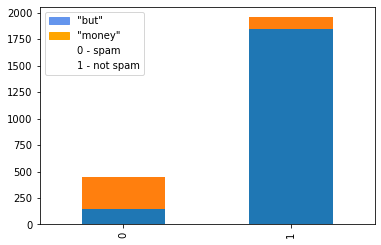

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df0 = pd.read_csv("fp.csv")

df0.plot.bar(stacked=True)

A = mpatches.Patch(color='cornflowerblue', label='"but"')
B = mpatches.Patch(color='orange', label='"money"')
C = mpatches.Patch(color='none', label='0 - spam')
D = mpatches.Patch(color='none', label='1 - not spam')

plt.legend(handles=[A,B,C,D], loc=2)
plt.show 


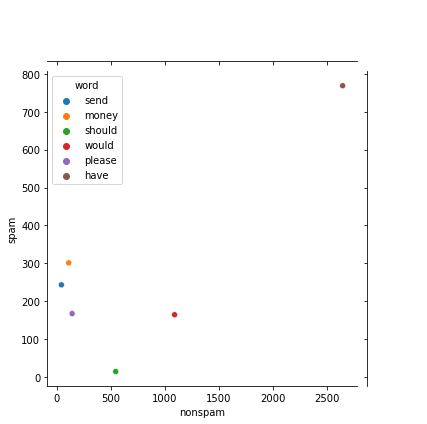

In [38]:
jdata = pd.read_csv("visualdata.csv")
jdata.head()
sns.jointplot(data=jdata, x="nonspam", y="spam",hue="word")

0 = send 1 = money 2 = should, 3 = would, 4 = please, 5 = have


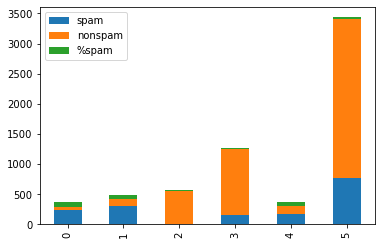

In [39]:
jdata = pd.read_csv("visualdata.csv")
jdata.head()
jdata.plot.bar(stacked=True)
plt.show
print("0 = send 1 = money 2 = should, 3 = would, 4 = please, 5 = have")

# KNN Classifier (Main Part)  
We want to create a KNN classifier that uses various words as our features to classify spam emails. Starting with only 2 features we chose the words "money" and "but" as our features. We chose these two because we noticed that both words we some that were used more in one type of email than the other. For example, the word "money" appeared way more in spam emails than in regular emails. We chose the word "but" because we saw a trend where spam emails generally do not use this word because they are trying to get the user to do something. When using the word "but" it meas the speaker is digressing on some topic which a spam emails usually does not do.

<AxesSubplot:xlabel='money', ylabel='but'>

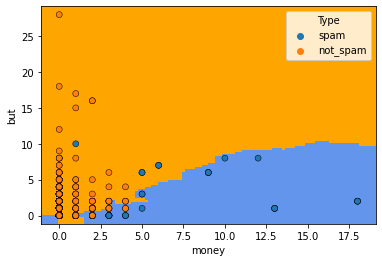

In [110]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 100

Spam_features = spam[['money' , 'but', 'Type']]
Not_spam_features = not_spam[['money', 'but', 'Type']]

features = pd.concat([Spam_features,Not_spam_features])
features = features.drop([0])

X = features[['money', 'but']]
y = features['Type']

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights= "distance")
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

sns.scatterplot( data = features, x = "money", y = "but", hue = "Type", alpha=1.0, edgecolor="black")

After running the KNN algorithm using "but" and "money" as our features, we see a good division between spam and not spam emails, however, alot of points are stacked on top of each other due to them containg the same value of instances where the words "money" and "but" show up. This is not good as our model is overfitting just because we have so mant data points stacked on each other. We are going to run K-fold validation test anyway to see our accuracy of our model but we know it is not going to be too good.

In [112]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from numpy import mean
from numpy import std
%matplotlib inline

scores = cross_val_score(clf, X, y, scoring= 'accuracy', cv=500)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.475 (0.242)


Now that we ran K-fold validation with k = 500, wee see that our accuract was 47%. This is not good as a simple coin flip can do better than our model. We know that we overfitted our model so we are going to increase the number of features we have to eliminiate the number of points stacking on top of each other. Next we will try KNN algorithm with 7 features. 

In [104]:
n_neighbors = 150

Spam_features = spam[['money' , 'but', 'send', '=', 'can', 'free', 'name', 'not', 'which','Type']]
Not_spam_features = not_spam[['money', 'but', 'send', '=', 'can', 'free' , 'name', 'not', 'which','Type']]

features = pd.concat([Spam_features,Not_spam_features])
features = features.drop([0])

X = features[['money', 'but', 'send', '=', 'can', 'free','name','not','which']]
y = features['Type']

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights= "distance")
clf.fit(X, y)



KNeighborsClassifier(n_neighbors=150, weights='distance')

In [105]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from numpy import mean
from numpy import std
%matplotlib inline

scores = cross_val_score(clf, X, y, scoring= 'accuracy', cv=500)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.674 (0.252)


# Conclusion (Report)  
We got a KNN classifier that has an accuracy of ...